# Table of Contents
 <p><div class="lev1 toc-item"><a href="#MIDS-w261-Machine-Learning-at-Scale" data-toc-modified-id="MIDS-w261-Machine-Learning-at-Scale-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MIDS w261 Machine Learning at Scale</a></div><div class="lev2 toc-item"><a href="#MidTerm-Exam" data-toc-modified-id="MidTerm-Exam-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MidTerm Exam</a></div><div class="lev3 toc-item"><a href="#Please-insert-your-contact-information-here" data-toc-modified-id="Please-insert-your-contact-information-here-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Please insert your contact information here</a></div><div class="lev1 toc-item"><a href="#Exam-Instructions" data-toc-modified-id="Exam-Instructions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exam Instructions</a></div><div class="lev1 toc-item"><a href="#Exam-questions-begins-here" data-toc-modified-id="Exam-questions-begins-here-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exam questions begins here</a></div><div class="lev2 toc-item"><a href="#Data-and--Starter-code-for-questions-6-and-7" data-toc-modified-id="Data-and--Starter-code-for-questions-6-and-7-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data and  Starter code for questions 6 and 7</a></div><div class="lev2 toc-item"><a href="#Data-for-question-11" data-toc-modified-id="Data-for-question-11-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data for question 11</a></div><div class="lev2 toc-item"><a href="#Starter-Code-for-question-17" data-toc-modified-id="Starter-Code-for-question-17-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Starter Code for question 17</a></div><div class="lev2 toc-item"><a href="#Starter-Code-for-question-18" data-toc-modified-id="Starter-Code-for-question-18-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Starter Code for question 18</a></div><div class="lev2 toc-item"><a href="#Starter-Code-for-question-19" data-toc-modified-id="Starter-Code-for-question-19-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Starter Code for question 19</a></div><div class="lev1 toc-item"><a href="#END-of-Exam" data-toc-modified-id="END-of-Exam-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>END of Exam</a></div>

In [1]:
import numpy as np
from __future__ import division

%reload_ext autoreload
%autoreload 2


# MIDS w261 Machine Learning at Scale
## MidTerm Exam  


MIDS Machine Learning at Scale



### Please insert your contact information here
__Insert you name here__           : Victoria Baker  
__Insert you email here__          : victoria.baker@ischool.berkeley.edu   
__Insert your  UC Berkeley ID here__: 3032501083

# Exam Instructions

1. : Please insert Name and Email address in the first cell of this notebook
2. : Please keep all your work and responses in ONE (1) notebook only 
3. : For the midterm you will need access to MrJob and Jupyter on your local machines (should be more than sufficient) or on Altiscale/AWS to complete some of the questions (like fill in the code to do X).
4. : As for question types:
    + Knowledge test Programmatic/doodle (take photos; embed the photos in your notebook, along with the photos directory in a zip file) 
    + All programmatic questions can be run locally on your laptop (using MrJob only) or on the cluster

5. : This is an open book exam meaning you can consult webpages and textbooks, class notes, slides etc. but you can not discuss with each other or any other person/group. If any collusion, then this will result in a zero grade and will be grounds for dismissal from the entire program. Please complete this exam by yourself within the time limit. 

# Exam questions begins here

## Data and  Starter code for questions 6 and 7

In [1]:
%%writefile kltext.txt
1.Data Science is an interdisciplinary field about processes and systems to extract knowledge or insights from large volumes of data in various forms (data in various forms, data in various forms, data in various forms), either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, data mining and predictive analytics, as well as Knowledge Discovery in Databases.
2.Machine learning is a subfield of computer science[1] that evolved from the study of pattern recognition and computational learning theory in artificial intelligence.[1] Machine learning explores the study and construction of algorithms that can learn from and make predictions on data.[2] Such algorithms operate by building a model from example inputs in order to make data-driven predictions or decisions,[3]:2 rather than following strictly static program instructions.

Writing kltext.txt


In [2]:
!cat kltext.txt

1.Data Science is an interdisciplinary field about processes and systems to extract knowledge or insights from large volumes of data in various forms (data in various forms, data in various forms, data in various forms), either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, data mining and predictive analytics, as well as Knowledge Discovery in Databases.
2.Machine learning is a subfield of computer science[1] that evolved from the study of pattern recognition and computational learning theory in artificial intelligence.[1] Machine learning explores the study and construction of algorithms that can learn from and make predictions on data.[2] Such algorithms operate by building a model from example inputs in order to make data-driven predictions or decisions,[3]:2 rather than following strictly static program instructions.

In [3]:
%%writefile kldivergence.py
#coding: utf-8
from __future__ import division
from mrjob.job import MRJob
import re
import numpy as np
class kldivergence(MRJob):
    
    # process each string character by character
    # the relative frequency of each character emitting Pr(character|str)
    # for input record 1.abcbe
    # emit "a"    [1, 0.2]
    # emit "b"    [1, 0.4] etc...
    def mapper1(self, _, line):
        index = int(line.split('.',1)[0])
        letter_list = re.sub(r"[^A-Za-z]+", '', line).lower()
        count = {}
        for l in letter_list:
            if count.has_key(l):
                count[l] += 1
            else:
                count[l] = 1
        for key in count:
            yield key, [index, count[key]*1.0/len(letter_list)]

    # on a component i calculate (e.g., "b")
    # Kullback–Leibler divergence of Q from P is defined
    #  (P(i) log (P(i) / Q(i))
    #
    def reducer1(self, key, values):
        p = 0
        q = 0
        for v in values:
            if v[0] == 1:  #String 1
                p = v[1]
            else:          # String 2
                q = v[1]
                
        ###### SOLUTION #############        
        output = p*np.log(p/q)
        yield None, output
        #############################

    #Aggegate components            
    def reducer2(self, key, values):
        kl_sum = 0
        for value in values:
            kl_sum = kl_sum + value
        yield "KLDivergence", kl_sum
            
    def steps(self):
        return [self.mr(mapper=self.mapper1,
                        reducer=self.reducer1),
                
                self.mr(reducer=self.reducer2)
               
               ]

if __name__ == '__main__':
    kldivergence.run()

Writing kldivergence.py


In [4]:
%reload_ext autoreload
%autoreload 2
from mrjob.job import MRJob
from kldivergence import kldivergence

#dont forget to save kltext.txt (see earlier cell)
mr_job = kldivergence(args=['kltext.txt'])
with mr_job.make_runner() as runner: 
    runner.run()
    # stream_output: get access of the output 
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

(u'KLDivergence', 0.0808827844)


No handlers could be found for logger "mrjob.job"


In [5]:
%%writefile kldivergence_smooth.py
from __future__ import division
from mrjob.job import MRJob
import re
import numpy as np
class kldivergence_smooth(MRJob):
    
    # process each string character by character
    # the relative frequency of each character emitting Pr(character|str)
    # for input record 1.abcbe
    # emit "a"    [1, (1+1)/(5+24)]
    # emit "b"    [1, (2+1)/(5+24) etc...
    def mapper1(self, _, line):
        index = int(line.split('.',1)[0])
        letter_list = re.sub(r"[^A-Za-z]+", '', line).lower()
        count = {}
        
        # (ni+1)/(n+24)
        
        for l in letter_list:
            if count.has_key(l):
                count[l] += 1
            else:
                count[l] = 1
        for key in count:
            ###### SOLUTION ############# 
            yield key, [index, (count[key] + 1)/(len(letter_list) + 24)]

    
    def reducer1(self, key, values):
        p = 0
        q = 0
        for v in values:
            if v[0] == 1:
                p = v[1]
            else:
                q = v[1]
        ###### SOLUTION #############         
        output = p*np.log(p/q)
        yield None, output

    # Aggregate components             
    def reducer2(self, key, values):
        kl_sum = 0
        for value in values:
            kl_sum = kl_sum + value
        yield "KLDivergence", kl_sum
            
    def steps(self):
        return [self.mr(mapper=self.mapper1,
                        reducer=self.reducer1),
                self.mr(reducer=self.reducer2)
               
               ]

if __name__ == '__main__':
    kldivergence_smooth.run()

Writing kldivergence_smooth.py


In [6]:
%reload_ext autoreload
%autoreload 2

from kldivergence_smooth import kldivergence_smooth
mr_job = kldivergence_smooth(args=['kltext.txt'])
with mr_job.make_runner() as runner: 
    runner.run()
    # stream_output: get access of the output 
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

(u'KLDivergence', 0.0672699729)


## Data for question 11

In [23]:
%%writefile nbTrain.txt
ham d1: “good.”
ham d2: “very good.”
spam d3: “bad.”
spam d4: “very bad.”
spam d5: “very bad, very BAD.”

Overwriting nbTrain.txt


In [24]:
!cat nbTrain.txt

ham d1: ���good.���
ham d2: ���very good.���
spam d3: ���bad.���
spam d4: ���very bad.���
spam d5: ���very bad, very BAD.���

In [25]:
%%writefile nbTest.txt
? d6: “good? bad! very Bad!” 

Overwriting nbTest.txt


In [26]:
!cat nbTest.txt

? d6: ���good? bad! very Bad!��� 

In [57]:
%%writefile nb_train.py
from __future__ import division
from mrjob.job import MRJob
from collections import defaultdict
import re
import numpy as np
from mrjob.step import MRStep

class nb_train(MRJob):
    
    def reducer_init(self):
        self.docs = []
        self.docCount = 0
        self.spamDocs = []
        self.hamDocs = []
        self.spamWords = 0
        self.hamWords = 0
        self.allWordCount = 0
        self.hamCounts = defaultdict(int)
        self.spamCounts = defaultdict(int)
        self.allWords = []

    def mapperTrain(self, _, line):
        line = line.strip()
        words = re.sub(r"[^a-z]+", '', line).lower()

        docClass, docId, text = line.split()[0:3]
        
        #if doc is spam, spamClass is 0, 1 for ham
        if(docClass == 'spam'):
            spamClass = 0
        else:
            spamClass = 1

        #count of word
        for word in re.findall(r'[a-z]+', text.strip().lower()):
            yield docId, (spamClass, word, 1)


    # Aggregate components             
    def reducerTrain(self, key, values):
        
        docId = key
        for x in values:
            spamClass = x[0]
            word = x[1]
            count = int(x[2])

        if(word not in self.allWords):
            self.allWords.append(word)
            self.allWordCount += 1

        if(docId not in self.docs):
            self.docs.append(docId)
            self.docCount += 1
            if(int(spamClass) == 0):
                self.hamDocs.append(docId)
            else:
                self.spamDocs.append(docId)

        if(int(spamClass) == 0):
            self.hamWords += int(count)
            self.hamCounts[word] += int(count)
        else:
            self.spamWords += int(count)
            self.spamCounts[word] += int(count)       

        for key in self.allWords:                                                                                                                                     
            pr_Ham = (float(self.hamCounts[key])+1) / (float(self.hamWords) + len(self.allWords)-1)
            pr_Spam = (float(self.spamCounts[key])+1)/ (float(self.hamWords) + len(self.allWords)-1)
            string = str(self.hamCounts[key]) + ',' + str(self.spamCounts[key]) +',' + str(pr_Ham) + ',' + str(pr_Spam)
            yield key, string

        #hamFreq = str(len(hamDocs))
        #spamFreq = str(len(spamDocs))
        #pr_Ham = str(float(len(hamDocs))/(float(hamWords) + float(spamWords)))
        #pr_Spam = str(float(len(spamDocs))/(float(hamWords) + float(spamWords)))                                  

        #priorString = hamFreq + ',' + spamFreq +',' + pr_Ham + ','+ pr_Spam
        #yield "ClassPriors", priorString   
            
    def steps(self):
        return [
                MRStep(
                mapper = self.mapperTrain,
                reducer_init = self.reducer_init,
                reducer = self.reducerTrain,
                jobconf = {'mapred.reduce.tasks' : 1 }
                  )  
               
               ]

if __name__ == '__main__':
    nb_train.run()

Overwriting nb_train.py


In [58]:
%reload_ext autoreload
%autoreload 2

from nb_train import nb_train
mr_job = nb_train(args=['nbTrain.txt'])
with mr_job.make_runner() as runner: 
    runner.run()
    # stream_output: get access of the output 
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

ZeroDivisionError: float division by zero

### Question 16

In [73]:
 %matplotlib inline
import numpy as np
import pylab 
size1 = size2 = size3 = 10000
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('Kmeandata.csv',data,delimiter = ",")


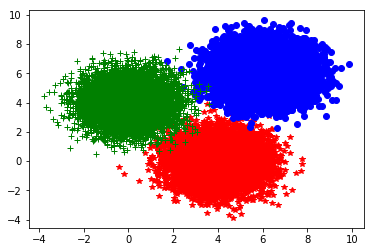

In [68]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [77]:
%%writefile Kmeans.py
from numpy import argmin, array, random
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import chain
import os

#Calculate find the nearest centroid for data point 
def MinDist(datapoint, centroid_points):
    datapoint = array(datapoint)
    centroid_points = array(centroid_points)
    diff = datapoint - centroid_points 
    diffsq = diff*diff
    # Get the nearest centroid for each instance
    minidx = argmin(list(diffsq.sum(axis = 1)))
    return minidx

#Check whether centroids converge
def stop_criterion(centroid_points_old, centroid_points_new,T):
    oldvalue = list(chain(*centroid_points_old))
    newvalue = list(chain(*centroid_points_new))
    Diff = [abs(x-y) for x, y in zip(oldvalue, newvalue)]
    Flag = True
    for i in Diff:
        if(i>T):
            Flag = False
            break
    return Flag

class MRKmeans(MRJob):
    centroid_points=[]
    k=3    
    def steps(self):
        return [
            MRStep(mapper_init = self.mapper_init, mapper=self.mapper,combiner = self.combiner,reducer=self.reducer)
               ]
    #load centroids info from file
    def mapper_init(self):
        print "Current path:", os.path.dirname(os.path.realpath(__file__))
        
        self.centroid_points = [map(float,s.split('\n')[0].split(',')) for s in open("Centroids.txt").readlines()]
        #open('Centroids.txt', 'w').close()
        
        print "Centroids: ", self.centroid_points
        
    #load data and output the nearest centroid index and data point 
    def mapper(self, _, line):
        D = (map(float,line.split(',')))
        yield int(MinDist(D,self.centroid_points)), (D[0],D[1],1)
    #Combine sum of data points locally
    def combiner(self, idx, inputdata):
        sumx = sumy = num = 0
        for x,y,n in inputdata:
            num = num + n
            sumx = sumx + x
            sumy = sumy + y
        yield idx,(sumx,sumy,num)
    #Aggregate sum for each cluster and then calculate the new centroids
    def reducer(self, idx, inputdata): 
        centroids = []
        num = [0]*self.k 
        for i in range(self.k):
            centroids.append([0,0])
        for x, y, n in inputdata:
            num[idx] = num[idx] + n
            #centroids[idx][0] = centroids[idx][0] + x
            #centroids[idx][1] = centroids[idx][1] + y
            x1 = self.centroid_points[idx][0]-x
            x2 = self.centroid_points[idx][1]-y
            weight = 1/(sqrt(x1**2+x2**2))
            weight_total += weight

            centroids[idx][0] = centroids[idx][0] + x*weight 
            centroids[idx][1] = centroids[idx][1] + y*weight
            distance_total += sqrt((x*weight)**2+(y*weight)**2)
            
            
        #centroids[idx][0] = centroids[idx][0]/num[idx]
        #centroids[idx][1] = centroids[idx][1]/num[idx]
        
        print distance_total/weight_total
        
        #need to weight denominator too--otherwise, we'll get skewed results
        weight_avg = running_weight_sum/num[idx]
        centroids[idx][0] = centroids[idx][0]/num[idx] 
        centroids[idx][1] = centroids[idx][1]/num[idx]

        yield idx,(centroids[idx][0],centroids[idx][1])

if __name__ == '__main__':
    MRKmeans.run()

Overwriting Kmeans.py


In [78]:
%reload_ext autoreload
%autoreload 2
from numpy import random
from Kmeans import MRKmeans, stop_criterion
mr_job = MRKmeans(args=['Kmeandata.csv', '--file=Centroids.txt'])

#Geneate initial centroids
centroid_points = []
k = 3
for i in range(k):
    centroid_points.append([random.uniform(-3,3),random.uniform(-3,3)])
with open('Centroids.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in i) + '\n' for i in centroid_points)

# Update centroids iteratively
i = 0



# Update centroids iteratively
for i in range(10):
    # save previous centoids to check convergency
    centroid_points_old = centroid_points[:]
    print "iteration"+str(i+1)+":"
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            key,value =  mr_job.parse_output_line(line)
            print key, value
            centroid_points[key] = value
    print "\n"
    i = i + 1
print "Centroids\n"
for centroid in centroid_points:
    print centroid

iteration1:
Current path: /tmp/Kmeans.root.20171019.005158.936702/job_local_dir/0/mapper/0
Centroids:  [[-0.439015435773, -2.8769007082], [-2.31902083471, -0.437603228662], [-0.771583783349, 0.943226534391]]
Current path: /tmp/Kmeans.root.20171019.005158.936702/job_local_dir/0/mapper/1
Centroids:  [[-0.439015435773, -2.8769007082], [-2.31902083471, -0.437603228662], [-0.771583783349, 0.943226534391]]


IndexError: list index out of range

##  Starter Code for question 17

In [12]:
import numpy as np
W = np.array([6, -3, -2, 1])
x = np.array([[1], 
              [2], 
              [3], 
              [4]])
y = 2
lam = 0.1
total_loss = 22.2

##  Starter Code for question 18

In [ ]:
# generate data artificially
X = np.arange(1, 20)

k, b = 1.5, 3

y = k * X + b

np.random.seed(21)
y += np.random.normal(loc=0.0, scale=3.0, size=len(X))

In [ ]:
plt.scatter(X, y)
plt.plot([0, 20], [b, k * 20 + b], "r", linewidth=2, label="Real")
plt.xlim([0, 20])
plt.ylim([0, 35])
plt.legend(loc="lower right")
plt.show()

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
class BasicLinearRegressionHomegrown(object):
    
    def __init__(self, l1=0.0, l2=0.0):
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.l1 = l1
        self.l2 = l2
        
    # calculate gradient of objective function
    def _grad(self, X, y):
        pred = np.dot(X, self._theta)
        error = pred - y
        gradient = 2 * np.dot(error, X) / X.shape[0]
        return gradient
    
    # full gradient descent, i.e., not stochastic gd
    def _gd(self, X, y, max_iter, alpha=0.005):
        for i in range(max_iter):
            # calculate gradient
            grad = self._grad(X, y)
            # do gradient step
            self._theta -= alpha * grad
    
    # public API for fitting a linear regression model
    def fit(self, X, y, max_iter=1000):
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        # initialize if the first step
        if self._theta is None:
            np.random.seed(21)
            self._theta = np.random.rand(X.shape[1])
        
        # do full gradient descent
        self._gd(X, y, max_iter)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    def score(self, X, y):
        pred = self.predict(X)
        error = pred - y
        obj = np.sum(error ** 2) / X.shape[0]
        return obj
        
    def predict(self, X):
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            pred = np.dot(X, self._theta)
        else:
            pred = np.dot(X, self.coef_) + self.intercept_
        return pred

## Starter Code for question 19

In [3]:
class BasicLinearRegressionHomegrown(object):
    
    def __init__(self, l=0.0, mu=0.0):
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.l = l
        self.mu = mu
    
    # calculate gradient of objective function
    def _grad(self, X, y):
        pred = np.dot(X, self._theta)
        error = pred - y
        gradient = 2 * np.dot(error, X) / X.shape[0]
        return gradient
    
    # full gradient descent, i.e., not stochastic gd
    def _gd(self, X, y, max_iter, alpha=0.005):
        for i in range(max_iter):
            # calculate gradient
            grad = self._grad(X, y)
            # do gradient step
            self._theta -= alpha * grad
    
    # public API for fitting a linear regression model
    def fit(self, X, y, max_iter=1000):
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        # initialize if the first step
        if self._theta is None:
            np.random.seed(21)
            self._theta = np.random.rand(X.shape[1])
        
        # do full gradient descent
        self._gd(X, y, max_iter)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    
    def score(self, X, y):
        pred = self.predict(X)
        error = pred - y
        obj = np.sum(error ** 2) / X.shape[0]
        return obj
        
    def predict(self, X):
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            pred = np.dot(X, self._theta)
        else:
            pred = np.dot(X, self.coef_) + self.intercept_
        return pred

# END of Exam